In [1]:
%load_ext autoreload
%autoreload 2 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from linear_gaussian_hmm import LinearGaussianHMM

# generate some fake 2-D observations

In [35]:
def linear_dynamics(xprev, params, controls):
    """Linear dynamics of state with controls"""
    state_noise = params['sigma_x'] @ np.random.randn(len(xprev))
    state_mu = (params['alpha']@xprev)*params['dt'] 
    x = state_mu + params['delta'] + state_noise + params['beta']*controls
    return x 

In [80]:
# time
T = np.linspace(0., 10., 1000)

# 2-D
xprev = np.array([0.9, 0.9])
x = np.zeros((len(T),2))

controls = np.array([2*np.sin(2*np.pi*4*T), 1*np.cos(2*np.pi*0.5*T)]).T

params = {'alpha': np.random.randn(2, 2)/4., 'sigma_x': 0.3*np.eye(2), 'dt': 1., 'delta': [0.5, -0.5], 
         'beta': np.array([0.1, 0.1])}

for i in range(len(T)):
    x[i] = linear_dynamics(xprev, params, controls[i])
    xprev = x[i]*1.
    

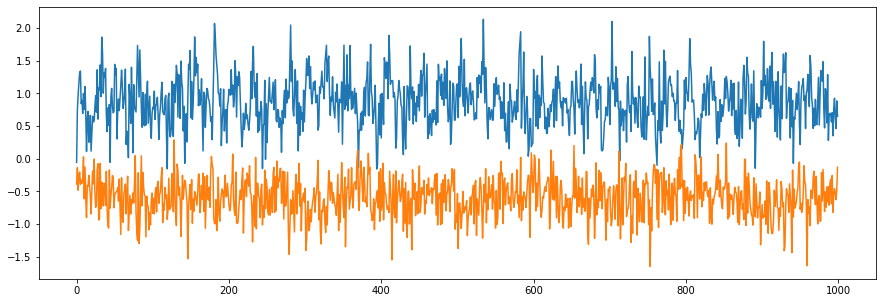

In [81]:
plt.figure(figsize=(15,5))
plt.plot(x)
plt.show()

# now fit this sequnce with a kalman filter

In [138]:
kf = LinearGaussianHMM(nstates = 2, nobsdims=2, niters=80)

In [139]:
x_smooth, logL = kf.fit(x.T)

.....Iteration 0/80, log likelihood = -3216.124, delta logL = nan .....
.....Iteration 1/80, log likelihood = -10890.614, delta logL = -7674.490 .....


/home/gagan/code/hmms/hmms/linear_gaussian_hmm/linear_gaussian_hmm.py:94: RuntimeWarning: divide by zero encountered in log
  logL = np.log(c).sum()


.....Iteration 2/80, log likelihood = -inf, delta logL = -inf .....
.....Iteration 3/80, log likelihood = -13915.243, delta logL = inf .....
.....Iteration 4/80, log likelihood = -13938.436, delta logL = -23.193 .....
.....Iteration 5/80, log likelihood = -13927.651, delta logL = 10.785 .....
.....Iteration 6/80, log likelihood = -13908.555, delta logL = 19.097 .....
.....Iteration 7/80, log likelihood = -13887.396, delta logL = 21.159 .....
.....Iteration 8/80, log likelihood = -13866.456, delta logL = 20.940 .....
.....Iteration 9/80, log likelihood = -13846.614, delta logL = 19.842 .....
.....Iteration 10/80, log likelihood = -13828.162, delta logL = 18.452 .....
.....Iteration 11/80, log likelihood = -13811.132, delta logL = 17.030 .....
.....Iteration 12/80, log likelihood = -13795.447, delta logL = 15.685 .....
.....Iteration 13/80, log likelihood = -13780.996, delta logL = 14.451 .....
.....Iteration 14/80, log likelihood = -13767.661, delta logL = 13.335 .....
.....Iteration 15

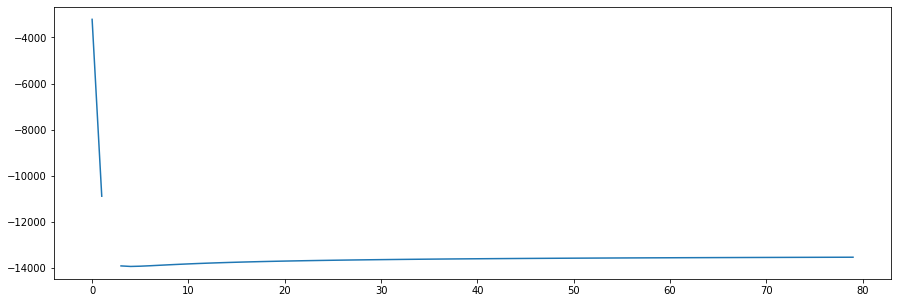

In [140]:
plt.figure(figsize=(15,5))
plt.plot(logL)

Text(0.5, 1.0, 'Smoothed observations in red')

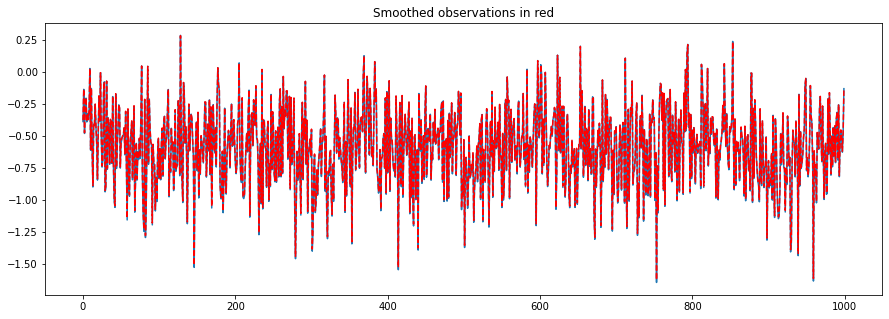

In [141]:
plt.figure(figsize = (15,5))
plt.plot(x[:,1])
plt.plot(x_smooth[1,:].T,'--r')
plt.title('Smoothed observations in red')

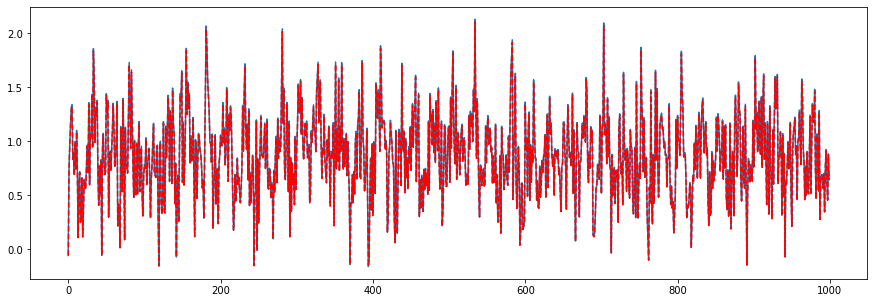

In [142]:
plt.figure(figsize = (15,5))
plt.plot(x[:,0])
plt.plot(x_smooth[0,:].T,'--r')